In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 40)
import os
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
from numpy import exp, loadtxt, pi, sqrt
from scipy.special import factorial
from lmfit import Model
import scipy.integrate as integrate
import matplotlib.dates as mdates
from tqdm.notebook import tqdm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [3]:
os.chdir('data')

In [ ]:
%ls -l | grep 'Nt' | grep '\-08\-' | grep -v 'No'
%ls -l | grep 'Nt' | grep '\-09\-' | grep -v 'No'
%ls -l | grep 'Nt' | grep '\-10\-' | grep -v 'No'
%ls -l | grep 'Nt' | grep '\-11\-' | grep -v 'No'
%ls -l | grep 'Nt' | grep '\-12\-' | grep -v 'No'

In [86]:
colnames_nt = np.array(['hour', 'minute', 'second','number','neutron_number','master'])
colnames_nt = np.append(colnames_nt, (np.array([[str(i)+'e', str(i)+'n'] for i in range(1, 17)]))).flatten()

nt_files = []
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Nt' in file and 'No' not in file:
            nt_files.append(file)
    break 

print(len(nt_files))
data_nt = []
       
#print(n_files)
for i in tqdm(range(len(nt_files))):
    file = nt_files[i]
    tmp = pd.read_csv(file, delim_whitespace = True, names = colnames_nt)
    tmp.dropna(inplace=True)
    tmp.hour = tmp.hour.apply(str)
    tmp.minute = tmp.minute.apply(str)
    tmp.second = tmp.second.apply(str)
    tmp['time'] = pd.to_datetime(file[5:7] + '.' + file[2:4] + '.' + file[8:12] + ' ' + \
                              tmp.hour + ':' + tmp.minute + ':' + tmp.second)
    tmp.drop(columns=['hour','minute','second'], inplace = True)
    #tmp.index=tmp['time']
    print(file, tmp.shape[0])
    data_nt.append(tmp)

nt_data = pd.concat(data_nt, axis = 0)
#nt_data = pd.read_csv('nt_data.csv')
nt_data = nt_data.sort_values(by='time')
nt_data.to_csv('nt_data.csv')
#print(nt_data)


266


Nt23-08-2019.txt 17143
Nt21-10-2019.txt 18797
Nt26-01-2020.txt 19693
Nt19-07-2019.txt 17678
Nt17-01-2020.txt 19666
Nt19-12-2019.txt 20727
Nt23-02-2020.txt 18966
Nt08-07-2019.txt 17894
Nt03-12-2019.txt 20671
Nt02-08-2019.txt 17811
Nt26-10-2019.txt 18691
Nt29-10-2019.txt 18473
Nt01-06-2019.txt 18785
Nt11-08-2019.txt 18158
Nt01-07-2019.txt 6196
Nt10-10-2019.txt 16068
Nt15-08-2019.txt 17641
Nt07-06-2019.txt 18133
Nt14-10-2019.txt 15804
Nt13-08-2019.txt 18298
Nt16-06-2019.txt 18488
Nt23-01-2020.txt 20456
Nt12-11-2019.txt 13180
Nt21-06-2019.txt 17881
Nt06-01-2020.txt 20716
Nt07-11-2019.txt 3054
Nt06-10-2019.txt 16949
Nt28-12-2019.txt 20424
Nt17-12-2019.txt 21208
Nt23-12-2019.txt 20788
Nt13-07-2019.txt 18986
Nt26-08-2019.txt 17107
Nt01-12-2019.txt 20262
Nt25-10-2019.txt 18965
Nt22-02-2020.txt 19109
Nt08-09-2019.txt 17729
Nt20-02-2020.txt 19461
Nt04-10-2019.txt 17337
Nt28-07-2019.txt 17584
Nt03-02-2020.txt 19087
Nt18-12-2019.txt 20529
Nt17-07-2019.txt 18669
Nt11-06-2019.txt 18272
Nt18-10-2019.

In [ ]:
nt_data = pd.read_csv('nt_data.csv')

In [42]:
periods = []
dates_left=['05-31-19','08-03-19', '09-11-19', '10-07-19', '11-24-19', '12-19-19']
dates_right=['06-25-19','08-28-19', '10-06-19', '10-31-19', '12-18-19', '01-12-20']

for i in range(len(dates_left)):
    tmp = nt_data[nt_data['time'] > dates_left[i]]
    tmp = tmp[tmp['time'] < dates_right[i]]
    tmp = tmp[tmp['time'].dt.date != '06-20-19']
    tmp = tmp[tmp['time'].dt.date != '09-20-19']
    periods.append(tmp)

good_nt_data = pd.concat(periods, axis = 0)


NameError: name 'nt_data' is not defined

In [ ]:
plt.figure(figsize=(18,10))
plt.hist(np.log10(nt_data[nt_data['neutron_number'] > 0]['neutron_number']), bins=30, histtype='step',lw=5)
plt.semilogy()
#plt.ylim(1,3e3)
#plt.xlim(1,)
print(nt_data[nt_data['master'] != 0]['neutron_number'].mean())

In [ ]:
data = nt_data#[nt_data['time'] > '09-11-19 00:00']
data0mas = data[data['master'] == 0]
#print(data5m0mas[[str(i)+'n' for i in range(1, 17)]].mean())
plt.figure(figsize=(18,10))
plt.bar(data0mas[[str(i)+'n' for i in range(1, 17)]].columns, \
        data0mas[[str(i)+'n' for i in range(1, 17)]].mean(), \
        yerr = data0mas[[str(i)+'n' for i in range(1, 17)]].sem(),
       tick_label=[str(i) for i in range(1, 17)])
plt.ylabel('pulses per 20 ms', fontsize=20)
plt.xlabel('detector #', fontsize=20)
plt.text(10, 0.3, 'd#5/d#10 = %.1f'%(data0mas['5n'].mean()/data0mas['10n'].mean()),fontsize=20)
plt.title('Average pulse number per 20ms in 0 master',fontsize=20);

In [ ]:
data = nt_data#[nt_data['time'] > '09-11-19 00:00']
data0mas = data[data['master'] == 0]
#print(data5m0mas[[str(i)+'n' for i in range(1, 17)]].mean())


df = data0mas
df.index = df['time']
dfp = df.resample('1M', label='left').mean()
dfe = df.resample('1M', label='left').sem()

plt.figure(figsize=(18,10))
for i in range(1, 5):
    plt.errorbar(dfp.index, dfp[str(i) +'n'], dfe[str(i) + 'n'], ms=10, fmt='o', label='d#' + str(i))

plt.ylabel('pulses per 20 ms', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('month', fontsize=20)
plt.title('Average pulse number per 20ms in 0 master, d#1-4',fontsize=20);
    
plt.figure(figsize=(18,10))
for i in range(5, 9):
    plt.errorbar(dfp.index, dfp[str(i) +'n'], dfe[str(i) + 'n'], ms=10, fmt='o', label='d#' + str(i))

plt.ylabel('pulses per 20 ms', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('month', fontsize=20)
plt.title('Average pulse number per 20ms in 0 master, d#5-8',fontsize=20);
    
plt.figure(figsize=(18,10))
for i in range(9, 13):
    plt.errorbar(dfp.index, dfp[str(i) +'n'], dfe[str(i) + 'n'], ms=10, fmt='o', label='d#' + str(i))

plt.ylabel('pulses per 20 ms', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('month', fontsize=20)
plt.title('Average pulse number per 20ms in 0 master, d#9-12',fontsize=20);
    
plt.figure(figsize=(18,10))
for i in range(13, 17):
    plt.errorbar(dfp.index, dfp[str(i) +'n'], dfe[str(i) + 'n'], ms=10, fmt='o', label='d#' + str(i))

plt.ylabel('pulses per 20 ms', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('month', fontsize=20)
plt.title('Average pulse number per 20ms in 0 master, d#13-16',fontsize=20);

In [ ]:
%ls -l Nt*\-05\-*

In [ ]:
data = good_nt_data#[nt_data['time'] > '09-11-19 00:00']
data0mas = data[data['master'] == 0].dropna().sort_values(by='time')
#print(data5m0mas[[str(i)+'n' for i in range(1, 17)]].mean())

periods = []
dates_left=['05-31-19','08-03-19', '09-11-19', '10-07-19', '11-24-19', '12-19-19']
dates_right=['06-25-19','08-28-19', '10-06-19', '10-31-19', '12-18-19', '01-12-20']

for i in range(len(dates_left)):
    tmp = data0mas[data0mas['time'] > dates_left[i]]
    tmp = tmp[tmp['time'] < dates_right[i]]
    periods.append(tmp)

rate = np.zeros((len(periods), 16))
err = np.zeros((len(periods), 16))

for i in range(len(periods)):
    periods[i] = periods[i][[str(j)+'n' for j in range(1, 17)]]
    rate[i] = periods[i].mean()
    err[i] = periods[i].sem()

for j in range(4):
    plt.figure(figsize=(18,10))
    for i in range(1, 5):
        plt.errorbar(range(1, len(periods)+1), rate[:,i+j*4-1]/rate[:,i+j*4-1].mean(),\
                     err[:,i+j*4-1]/rate[:,i+j*4-1].mean(), ms=10, fmt='o', \
                     label='d#' + str(i+j*4))
        plt.axhline(1,lw=3,c='r')
        plt.grid('both')

    plt.ylabel('norm pulses per 20 ms', fontsize=20)
    plt.legend(fontsize=15)
    plt.xlabel('month', fontsize=20)
    plt.xlim(0,)
    #plt.xticks(range(1, len(periods)+1))
    plt.title('Normalized average pulse number per 20ms in 0 master, d#%d-%d'%(j*4+1, j*4+4), fontsize=20);
    
plt.figure(figsize=(18,10))
rate = np.sum(rate,axis=1)
err = np.sum(err,axis=1)
plt.errorbar(range(1, len(periods)+1), rate/rate.mean(),\
                     err/rate.mean(), ms=10, fmt='o', \
                     label='sum of 16 det')
plt.axhline(1,lw=3,c='r')
plt.grid('both')

plt.ylabel('norm pulses per 20 ms', fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('period', fontsize=20)
plt.xlim(0,)
    #plt.xticks(range(1, len(periods)+1))
plt.title('Normalized pulse number per 20ms in 0 master, d#%d-%d'%(1, 16), fontsize=20);

In [ ]:
plt.figure(figsize=(18,10))
dt['master'].hist()

In [ ]:
plt.figure(figsize=(18,10))
for dt in periods:
    dt['fold'] = 0
    for name in [str(i)+'e' for i in range(1, 17)]:
        dt['fold'] += dt[name].apply(lambda x: int(x>0))
    dt = dt[dt['master'] == 7]
    print(dt.shape[0])
    #dt = dt[dt['fold'] >= 8]
    plt.hist(np.log(dt['neutron_number']),range=(1, 4),bins=14, histtype='step', lw=3)
    
plt.semilogy()
plt.title('Neutron multiplicity distribution', fontsize=20)
plt.xlim(1,)
plt.xlabel('ln(neutron multiplicity)', fontsize=20)
plt.ylabel('events', fontsize=20)
x = np.linspace(3, 100, 3000)
y = 4e5*(x)**(-3.7)
plt.plot(np.log(x), y, c='r', lw=3)
y = 4e5*(x/1.2)**(-3.7)
plt.plot(np.log(x), y, c='r', lw=3)
plt.text(2.5, 1e4, 'low fit = 4e5 * x**(-3.7)', fontsize=15)
plt.text(2.5, 3e3, 'high fit = 4e5 * (x/1.2)**(-3.7)', fontsize=15)

In [ ]:
plt.figure(figsize=(18,10))
for dt in periods:
    dt['fold'] = 0
    for name in [str(i)+'e' for i in range(1, 17)]:
        dt['fold'] += dt[name].apply(lambda x: int(x>0))
    dt = dt[dt['master'] == 7]
    print(dt.shape[0])
    #dt = dt[dt['fold'] >= 8]
    plt.hist((dt['neutron_number']),range=(3, 100),bins=49, histtype='step', lw=3)
    
plt.loglog()
plt.title('Neutron multiplicity distribution', fontsize=20)
plt.xlim(3,40)
plt.ylim(1,)
plt.xlabel('neutron multiplicity', fontsize=20)
plt.ylabel('events', fontsize=20)
x = np.linspace(3, 100, 3000)
y = 3e6*(x)**(-4.7)
plt.plot(x, y, c='r', lw=3)
y = 3e6*(x/1.2)**(-4.7)
plt.plot(x, y, c='r', lw=3)
plt.text(15, 1e4, 'low fit = 3e6 * x**(-4.7)', fontsize=15)
plt.text(15, 3e3, 'high fit = 7e6 * (x/1.2)**(-4.7)', fontsize=15)

In [ ]:
#for dt in [good_nt_data[good_nt_data['time'] > '09-11-19']]:
points = np.zeros((len(periods),16))
points_err = np.zeros((len(periods),16))
for dt, c in zip(periods, range(len(periods))):
#for dt in [good_nt_data[good_nt_data['time'] > '09-11-19']]:
    data5m = dt#nt_data[nt_data['time'] > '09-11-19 00:00']

    data5m['fold'] = 0
    for name in [str(i)+'e' for i in range(1, 17)]:
        data5m['fold'] += data5m[name].apply(lambda x: int(x>0))

    data5m1mas = data5m[data5m['fold'] == 16]
    data5m1mas = data5m1mas[data5m1mas['master']&2 == 2]
    #print(data5m0mas[[str(i)+'n' for i in range(1, 17)]].mean())

    neutron_means = []
    neutron_sem = []
    for i in range(1, 17):
        neutron_means.append(data5m1mas[data5m1mas[str(i)+'e'] > 0][str(i)+'n'].mean())
        neutron_sem.append(data5m1mas[data5m1mas[str(i)+'e'] > 0][str(i)+'n'].sem())

    neutron_means = np.array(neutron_means)
    neutron_sem = np.array(neutron_sem)

    #----------------------------------------------Average Neutron Counting------------------------

    plt.figure(figsize=(18,10))
    plt.bar(data5m1mas[[str(i)+'n' for i in range(1, 17)]].columns, \
            neutron_means, \
            yerr = neutron_sem,
           tick_label=[str(i) for i in range(1, 17)], label='M > 1')
    #plt.text(7.33, neutron_means[10]+0.05, 'nonzero master d#5/d#10 = %.1f'%(neutron_means[4]/neutron_means[9]),fontsize=20)


    data = dt#[nt_data['time'] > '09-11-19 00:00']
    data0mas = data[data['master'] == 0]
    #print(data5m0mas[[str(i)+'n' for i in range(1, 17)]].mean())
    plt.bar(data0mas[[str(i)+'n' for i in range(1, 17)]].columns, \
            data0mas[[str(i)+'n' for i in range(1, 17)]].mean()*0.975, \
            yerr = data0mas[[str(i)+'n' for i in range(1, 17)]].sem(),
           tick_label=[str(i) for i in range(1, 17)],width=0.5, label='M = 0')
    
    plt.bar(data0mas[[str(i)+'n' for i in range(1, 17)]].columns, \
            neutron_means - data0mas[[str(i)+'n' for i in range(1, 17)]].mean()*0.975, \
           tick_label=[str(i) for i in range(1, 17)],width=0.3, label='diff')
    plt.ylabel('pulses per 20 ms', fontsize=20)
    plt.xlabel('detector #', fontsize=20)
    #plt.text(8, neutron_means[10]+0.1, 'zero master d#5/d#10 = %.1f'%(data0mas['5n'].mean()/data0mas['10n'].mean()),fontsize=20)
    plt.title('Average pulse number per 20ms in 0 and nonzero master',fontsize=20)
    plt.legend(fontsize=20)
    
    print(neutron_means.mean(), (data0mas[[str(i)+'n' for i in range(1, 17)]].mean()*0.975).mean())
    points[c] = neutron_means #- data0mas[[str(i)+'n' for i in range(1, 17)]].mean()*0.975
    points_err[c] = neutron_sem
    #----------------------------------------------Average Pulse Height------------------------------------

'''    dt = dt[dt['master']&2==2]
    amps_data = dt[dt['fold'] == 16][[str(i)+'e' for i in range(1, 17)]]
    amps_data['sum_amp'] = amps_data.sum(axis=1)
    amps_data = amps_data[amps_data['sum_amp'] > 14000]
    #amps_data = dt[[str(i)+'e' for i in range(1, 17)]]
    
    amps_means = []
    amps_sem = []
    for i in range(1, 17):
        amps_means.append(amps_data[str(i)+'e'].mean())
        amps_sem.append(amps_data[str(i)+'e'].sem())

    amps_means = np.array(amps_means)
    amps_sem = np.array(amps_sem)

    #----------------------------------------------Average Neutron Counting------------------------

    plt.figure(figsize=(18,10))
    plt.bar(amps_data[[str(i)+'e' for i in range(1, 17)]].columns, \
            amps_means/amps_means.mean(), \
            yerr = amps_sem/amps_means.mean(),
           tick_label=[str(i) for i in range(1, 17)], label='M > 1')
    plt.text(7.33, amps_means[10]/amps_means.mean()+0.05, 'big edep d#5/d#10 = %.1f'%(amps_means[4]/amps_means[9]),fontsize=20)

    plt.ylim(0.7,)
    plt.ylabel('Average pulse height from eas front in events with fold=16, a.u.', fontsize=15)
    plt.xlabel('detector #', fontsize=20)
    plt.title('Average amplitude in eas recording with fold=16 divided to the value for d#10 \
            (It shows the gain difference)',fontsize=15);
    
    #----------------------------------------------Average Neutron EAS Addition--------------------------------

    plt.axhline(1,lw=3,c='r')
        addition = (neutron_means - data0mas[[str(i)+'n' for i in range(1, 17)]].mean())/ \
          data0mas[[str(i)+'n' for i in range(1, 17)]].mean() * 100.

    plt.figure(figsize=(18,10))
    plt.bar(data5m1mas[[str(i)+'e' for i in range(1, 17)]].columns, \
            addition,
           tick_label=[str(i) for i in range(1, 17)])
    plt.ylabel('Average neutron addition in EAS, \%', fontsize=20)
    plt.xlabel('detector #', fontsize=20)
    plt.text(10, 20, 'd#5/d#10 = %.1f'%(addition['5n'].mean()/addition['10n'].mean()),fontsize=20)
    plt.title('Average neutron addition in EAS',fontsize=20);'''


In [ ]:
fig, ax = plt.subplots(8, 2)
ax = ax.ravel()
for i, axis in zip(range(16), ax):
    axis.errorbar(range(1,len(periods)+1),points[:,i]/points[1:,i].mean(), \
                 points_err[:,i]/points[1:,i].mean(),fmt='o',ms=10)
    axis.set_xlabel('period',fontsize=10)
    #axis.set_ylabel('diff (mean neutrons in M>1)-(mean neutrons in M=0)', fontsize=20)
    axis.set_title('d#' + str(i+1), fontsize=10)

In [ ]:
plt.figure(figsize=(18,10))

ps = np.sum(points,axis=1)/np.sum(points,axis=1)[1:].mean()
ps_err = np.sum(points_err,axis=1).mean()/4.
plt.errorbar(range(1,len(periods)+1),ps, \
                 ps_err,fmt='o',ms=10)
plt.xlabel('period',fontsize=10)
plt.ylabel('mean neutrons in M>1', fontsize=20)

In [ ]:
data5m = good_nt_data#nt_data[nt_data['time'] > '09-11-19 00:00']
print(data5m.head())
data5m['fold'] = 0
for name in [str(i)+'e' for i in range(1, 17)]:
    data5m['fold'] += data5m[name].apply(lambda x: int(x>0))

data5m1mas = data5m[data5m['fold'] > 0]
#print(data5m0mas[[str(i)+'n' for i in range(1, 17)]].mean())

neutron_means = []
neutron_sem = []
for i in range(1, 17):
    neutron_means.append(data5m1mas[data5m1mas[str(i)+'e'] > 0][str(i)+'n'].mean())
    neutron_sem.append(data5m1mas[data5m1mas[str(i)+'e'] > 0][str(i)+'n'].sem())

neutron_means = np.array(neutron_means)
neutron_sem = np.array(neutron_sem)

#----------------------------------------------Average Neutron Counting------------------------

plt.figure(figsize=(18,10))
plt.bar(data5m1mas[[str(i)+'n' for i in range(1, 17)]].columns, \
        neutron_means, \
        yerr = neutron_sem,
       tick_label=[str(i) for i in range(1, 17)], label='M > 0')
plt.text(7.33, 0.3, 'nonzero master d#5/d#10 = %.1f'%(neutron_means[4]/neutron_means[9]),fontsize=20)


data = good_nt_data#[nt_data['time'] > '09-11-19 00:00']
data0mas = data[data['master'] == 0]
#print(data5m0mas[[str(i)+'n' for i in range(1, 17)]].mean())
plt.bar(data0mas[[str(i)+'n' for i in range(1, 17)]].columns, \
        data0mas[[str(i)+'n' for i in range(1, 17)]].mean(), \
        yerr = data0mas[[str(i)+'n' for i in range(1, 17)]].sem(),
       tick_label=[str(i) for i in range(1, 17)],width=0.5, label='M = 0')
plt.ylabel('pulses per 20 ms', fontsize=20)
plt.xlabel('detector #', fontsize=20)
plt.text(8, 0.34, 'zero master d#5/d#10 = %.1f'%(data0mas['5n'].mean()/data0mas['10n'].mean()),fontsize=20)
plt.title('Average pulse number per 20ms in 0 and nonzero master',fontsize=20)
plt.legend(fontsize=20)

#----------------------------------------------Average Neutron EAS Addition--------------------------------

addition = (neutron_means - data0mas[[str(i)+'n' for i in range(1, 17)]].mean())/ \
      data0mas[[str(i)+'n' for i in range(1, 17)]].mean() * 100.

plt.figure(figsize=(18,10))
plt.bar(data5m1mas[[str(i)+'e' for i in range(1, 17)]].columns, \
        addition,
       tick_label=[str(i) for i in range(1, 17)])
plt.ylabel('Average neutron addition in EAS, \%', fontsize=20)
plt.xlabel('detector #', fontsize=20)
plt.text(10, 20, 'd#5/d#10 = %.1f'%(addition['5n'].mean()/addition['10n'].mean()),fontsize=20)
plt.title('Average neutron addition in EAS',fontsize=20);

#----------------------------------------------Average Pulse Height------------------------------------

amps_data = data5m1mas[data5m1mas['fold'] == 16][[str(i)+'e' for i in range(1, 17)]]

plt.figure(figsize=(18,10))
plt.bar(data5m1mas[[str(i)+'e' for i in range(1, 17)]].columns, \
        amps_data.mean(), \
        yerr = amps_data.sem(),
       tick_label=[str(i) for i in range(1, 17)])
plt.ylabel('Average pulse height from eas front in events with fold=16', fontsize=20)
plt.xlabel('detector #', fontsize=20)
plt.text(10, amps_data['10e'].mean()*1.5, 'd#5/d#10 = %.1f'%(amps_data['5e'].mean()/amps_data['10e'].mean()),fontsize=20)
plt.title('Average amplitude in eas recording',fontsize=20);


31
31
30
31
31


/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:114: RuntimeWarning: divide by zero encountered in power


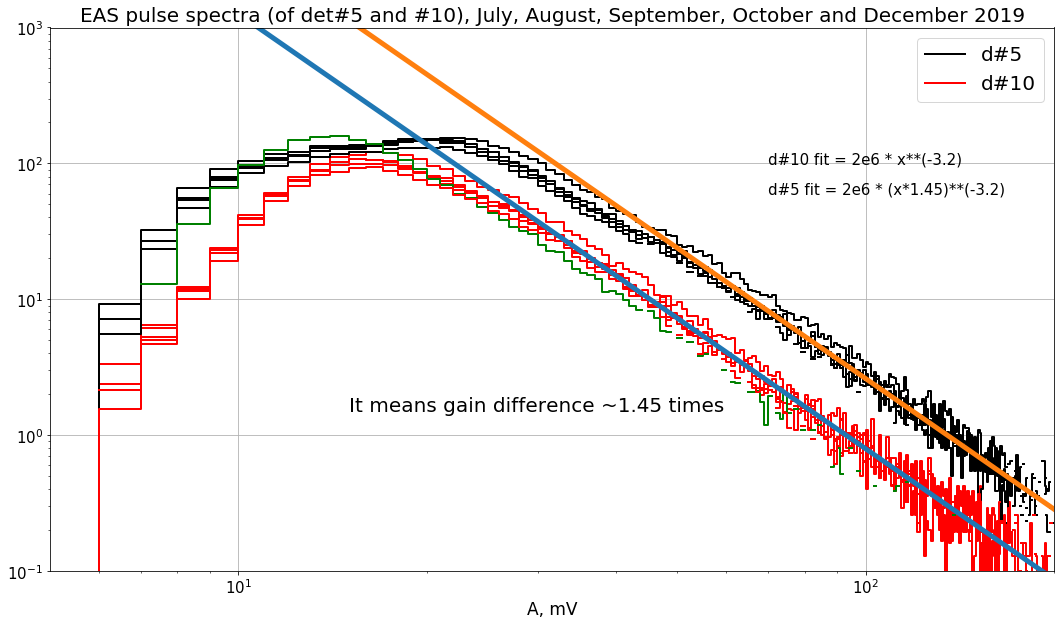

In [40]:
sp_files = []
color = {5: 'black',7: 'green', 10: 'red'}
label = {5: 'd#5', 7: 'd#7', 10: 'd#10'}
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Sp' in file and '2019' in file and '-12-' in file:
            sp_files.append(file)
    break 
sp_data = pd.read_csv(sp_files[0], delim_whitespace = True, names=[str(i) for i in range(1,17)])
            
#print(n_files)
for file in sp_files[1:]:
    sp_data += pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)])
    
sp_data /= len(sp_files)
print(len(sp_files))

plt.figure(figsize=(18,10))

for i in [5, 10]:#range(1, 17):
    plt.step(sp_data.index, sp_data[str(i)],lw=2,c=color[i],label=label[i])

#----------------------------------------------------------
sp_files = []
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Sp' in file and '2019' in file and '-10-' in file:
            sp_files.append(file)
    break 
sp_data = pd.read_csv(sp_files[0], delim_whitespace = True, names=[str(i) for i in range(1,17)])
            
#print(n_files)
for file in sp_files[1:]:
    sp_data += pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)])
    
sp_data /= len(sp_files)
print(len(sp_files))

for i in [5, 10]:#range(1, 17):
    plt.step(sp_data.index, sp_data[str(i)],lw=2,c=color[i])

#-----------------------------------------------------------
sp_files = []
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Sp' in file and '2019' in file and '-09-' in file:
            sp_files.append(file)
    break 
sp_data = pd.read_csv(sp_files[0], delim_whitespace = True, names=[str(i) for i in range(1,17)])
            
#print(n_files)
for file in sp_files[1:]:
    sp_data += pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)])
    
sp_data /= len(sp_files)
print(len(sp_files))

for i in [5, 10]:#range(1, 17):
    plt.step(sp_data.index, sp_data[str(i)],lw=2,c=color[i])

#-----------------------------------------------------------
sp_files = []
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Sp' in file and '2019' in file and '-08-' in file:
            sp_files.append(file)
    break 
sp_data = pd.read_csv(sp_files[0], delim_whitespace = True, names=[str(i) for i in range(1,17)])
            
#print(n_files)
for file in sp_files[1:]:
    sp_data += pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)])
    
sp_data /= len(sp_files)
print(len(sp_files))

for i in [5, 10]:#range(1, 17):
    plt.step(sp_data.index, sp_data[str(i)],lw=2,c=color[i])

#-----------------------------------------------------------
sp_files = []
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Sp' in file and '2019' in file and '-07-' in file:
            sp_files.append(file)
    break 
sp_data = pd.read_csv(sp_files[0], delim_whitespace = True, names=[str(i) for i in range(1,17)])
            
#print(n_files)
for file in sp_files[1:]:
    sp_data += pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)])
    
sp_data /= len(sp_files)
print(len(sp_files))

for i in [5,7, 10]:#range(1, 17):
    plt.step(sp_data.index, sp_data[str(i)],lw=2,c=color[i])

#-----------------------------------------------------------

#plt.semilogy()
plt.loglog()
plt.xlim(0, 200)
plt.ylim(0.1, 1e3)
plt.grid('both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('A, mV', fontsize=17)
plt.legend(fontsize=20)
plt.title('EAS pulse spectra (of det#5 and #10), July, August, September, October and December 2019', \
          fontsize=20);
#plt.axvline(15);
x = np.linspace(0,1000,10000)
y = 2e6*x**(-3.2)
plt.plot(x,y,lw=5);
plt.plot(x*1.45,y,lw=5);
plt.text(70, 100, 'd#10 fit = 2e6 * x**(-3.2)', fontsize=15)
plt.text(70, 60, 'd#5 fit = 2e6 * (x*1.45)**(-3.2)', fontsize=15)
plt.text(15, 1.5, 'It means gain difference ~1.45 times', fontsize=20);

141


/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in power
/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in power


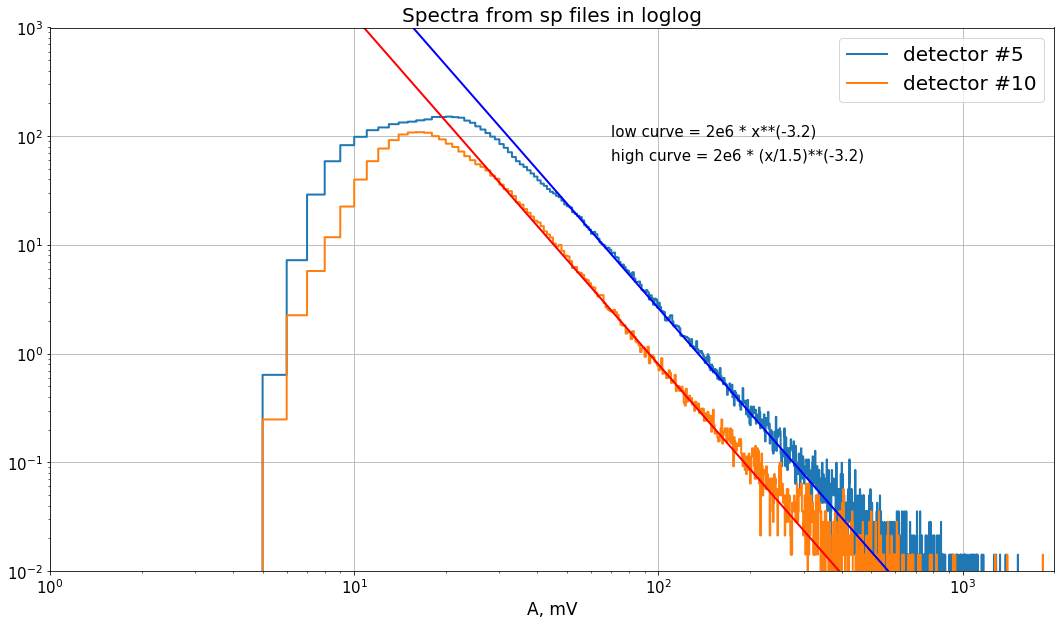

In [48]:
sp_files = []
sp_data = np.zeros((2048, 16))
sp_data = pd.DataFrame(sp_data, columns=[str(i) for i in range(1,17)])

color = {5: 'black', 10: 'red'}
label = {5: 'd#5', 10: 'd#10'}
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Sp' in file:
            #print(file[5:7] + '.' + file[2:4] + '.' + file[8:12] +' ' + '00:00')
            time = pd.to_datetime(file[5:7] + '.' + file[2:4] + '.' + file[8:12] + ' ' + '00:00')
            dates_l = pd.to_datetime(dates_left)
            dates_r = pd.to_datetime(dates_right)
            for left, right in zip(dates_l, dates_r):
                if time < right and time > left:
                    #print(time)
                    sp_files.append(file)
    break
    

#print(sp_data)
#print(n_files)
for file in sp_files:
    tmp = pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)]).dropna()
    #print(tmp)
    sp_data = sp_data.add(tmp, fill_value=0)

#print(sp_data)
sp_data /= 1.*len(sp_files)
print(len(sp_files))

plt.figure(figsize=(18,10))

for i in [5, 10]:
#for i in range(1, 17):
    plt.step(sp_data.index, sp_data[str(i)],lw=2,label='detector #'+str(i))

#----------------------------------------------------------

#plt.semilogy()
plt.loglog()
plt.xlim(1, 2000)
plt.ylim(0.01, 1e3)
plt.grid('both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('A, mV', fontsize=17)
plt.legend(fontsize=20)
plt.title('Spectra from sp files in loglog', \
          fontsize=20);
#plt.axvline(15);
x = np.linspace(0,1000,10000)
y = 2e6*x**(-3.2)
plt.plot(x,y,lw=2, c='r');
plt.plot(x*1.45,y,lw=2, c='b');

x =np.linspace(0,1000,10000)
y = 2e6*x**(-3.2)
#plt.plot(x,2e6*(x/1.47)**(-3.2),lw=2, c='black');

plt.text(70, 100, 'low curve = 2e6 * x**(-3.2)', fontsize=15)
plt.text(70, 60, 'high curve = 2e6 * (x/1.5)**(-3.2)', fontsize=15)
plt.savefig('d5d10fromsp_loglog.png', dps=600)

141


/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in power
/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in power


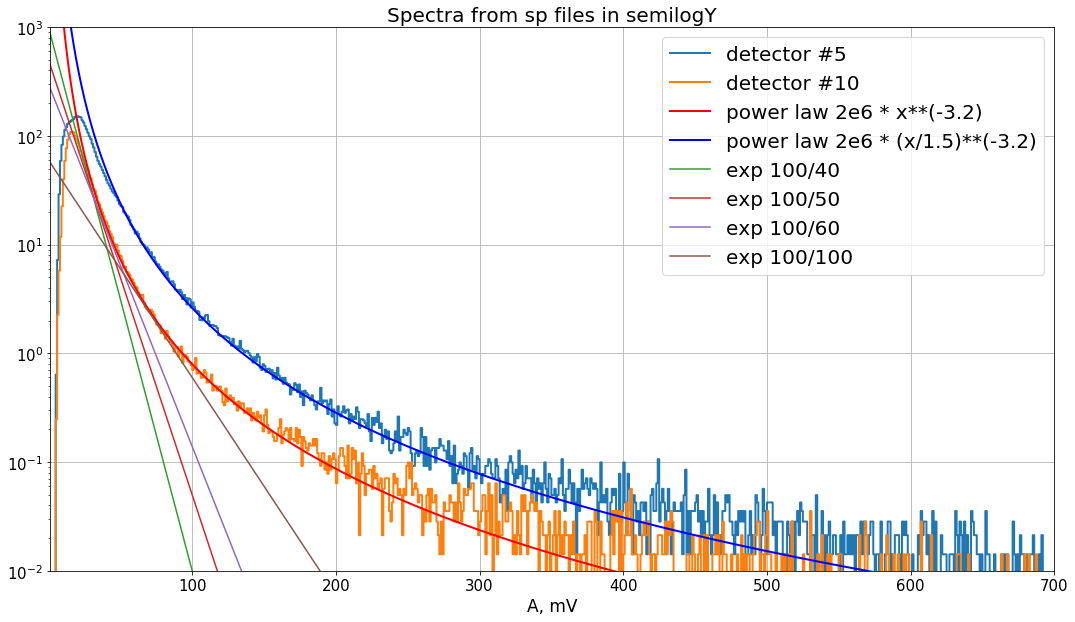

In [59]:
sp_files = []
sp_data = np.zeros((2048, 16))
sp_data = pd.DataFrame(sp_data, columns=[str(i) for i in range(1,17)])

color = {5: 'black', 10: 'red'}
label = {5: 'd#5', 10: 'd#10'}
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Sp' in file:
            #print(file[5:7] + '.' + file[2:4] + '.' + file[8:12] +' ' + '00:00')
            time = pd.to_datetime(file[5:7] + '.' + file[2:4] + '.' + file[8:12] + ' ' + '00:00')
            dates_l = pd.to_datetime(dates_left)
            dates_r = pd.to_datetime(dates_right)
            for left, right in zip(dates_l, dates_r):
                if time < right and time > left:
                    #print(time)
                    sp_files.append(file)
    break
    

#print(sp_data)
#print(n_files)
for file in sp_files:
    tmp = pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)]).dropna()
    #print(tmp)
    sp_data = sp_data.add(tmp, fill_value=0)

#print(sp_data)
sp_data /= 1.*len(sp_files)
print(len(sp_files))

plt.figure(figsize=(18,10))

for i in [5, 10]:
#for i in range(1, 17):
    plt.step(sp_data.index, sp_data[str(i)],lw=2,label='detector #'+str(i))

#----------------------------------------------------------

#plt.semilogy()
plt.semilogy()
plt.xlim(1, 700)
plt.ylim(0.01, 1e3)
plt.grid('both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('A, mV', fontsize=17)
plt.title('Spectra from sp files in semilogY', \
          fontsize=20);
#plt.axvline(15);
x = np.linspace(0,1000,10000)
y = 2e6*x**(-3.2)
plt.plot(x,y,lw=2, c='r', label='power law 2e6 * x**(-3.2)');
plt.plot(x*1.45,y,lw=2, c='b', label='power law 2e6 * (x/1.5)**(-3.2)');
plt.plot(x, 1e3*np.exp(-x/(40/np.log(100))), label = 'exp 100/40')
plt.plot(x, 5e2*np.exp(-x/(50/np.log(100))), label = 'exp 100/50')
plt.plot(x, 3e2*np.exp(-x/(60/np.log(100))), label = 'exp 100/60')
plt.plot(x, 6e1*np.exp(-x/(100/np.log(100))), label = 'exp 100/100')
plt.legend(fontsize=20)
x =np.linspace(0,1000,10000)
y = 2e6*x**(-3.2)
#plt.plot(x,2e6*(x/1.47)**(-3.2),lw=2, c='black');
plt.savefig('d5d10fromsp_semilogY.png', dps=600)

dropped
23
24
dropped
23
23
23
23


/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in power
/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in power


NameError: name 'nt_data' is not defined

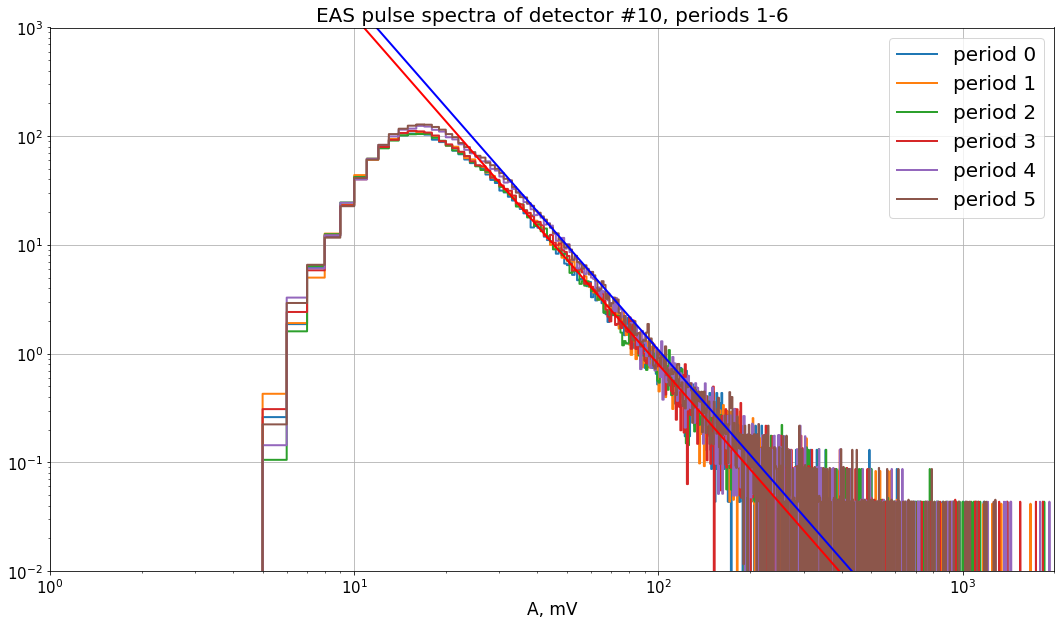

In [85]:
sp_data = np.zeros((2048, 16))
sp_data = pd.DataFrame(sp_data, columns=[str(i) for i in range(1,17)])

plt.figure(figsize=(18,10))
color = {5: 'black', 10: 'red'}
label = {5: 'd#5', 10: 'd#10'}
for i in range(6):
    n_f = 0
    dates_l = pd.to_datetime(dates_left[i])
    dates_r = pd.to_datetime(dates_right[i])
    for file in sp_files:
            #print(file[5:7] + '.' + file[2:4] + '.' + file[8:12] +' ' + '00:00')
            time = pd.to_datetime(file[5:7] + '.' + file[2:4] + '.' + file[8:12] + ' ' + '00:00')
            if time < dates_r and time > dates_l:
                if time.date() == pd.to_datetime('2019-06-20').date() or time.date() == pd.to_datetime('2019-09-20').date():
                    print('dropped')
                    continue
                tmp = pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)]).dropna()
                sp_data = sp_data.add(tmp, fill_value=0)
                n_f += 1
    sp_data /= 1.*n_f
    print(n_f)
    plt.step(sp_data.index, sp_data['10'],lw=2,label='period ' +str(i))#,c=color[i],label=label[i])
    

plt.loglog()
plt.xlim(1, 2000)
plt.ylim(0.01, 1e3)
plt.grid('both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('A, mV', fontsize=17)
plt.legend(fontsize=20)
plt.title('EAS pulse spectra of detector #10, periods 1-6', \
          fontsize=20);
#plt.axvline(15);
x = np.linspace(0,1000,10000)
y = 2e6*x**(-3.2)
plt.plot(x,y,lw=2, c='r');
plt.plot(x*1.1,y,lw=2, c='b');

x =np.linspace(0,1000,10000)
y = 2e6*x**(-3.2)
#plt.plot(x,2e6*(x/1.47)**(-3.2),lw=2, c='black');
plt.hist(nt_data[[str(i)+'e' for i in range(1,17)]].sum(axis=1), range=(1, 1000), bins=100, histtype='step',lw=3,color='b')
plt.text(70, 100, 'low fit = 2e6 * x**(-3.2)', fontsize=15)
plt.text(70, 60, 'high fit = 2e6 * (x/1.1)**(-3.2)', fontsize=15)
plt.text(8, 0.3, 'It means gain difference ~1.5 times', fontsize=20);

In [ ]:
plt.figure(figsize=(18,10))
sp_files = []
for address, dirs, files in os.walk('.'):
    for file in files:
        if 'Sp2' in file and '2020' in file and '-02-' in file:
            sp_files.append(file)
    break 
sp_data = pd.read_csv(sp_files[0], delim_whitespace = True, names=[str(i) for i in range(1,17)])
            
#print(n_files)
for file in sp_files[1:]:
    tmp = pd.read_csv(file, delim_whitespace = True, names=[str(i) for i in range(1,17)])
    sp_data = sp_data.add(tmp, fill_value=0)
    
sp_data /= len(sp_files)
print(len(sp_files))

for i in range(1, 17):
    #if i == 7: continue
    plt.step(sp_data.index, sp_data[str(i)],lw=2)

#-----------------------------------------------------------

#plt.semilogy()
plt.loglog()
plt.xlim(0, 200)
plt.ylim(0.1, 1e3)
plt.grid('both')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('A, mV', fontsize=17)
plt.legend(fontsize=20)
plt.title('EAS pulse spectra of detectors P-16-YBJ, from 20.02.20', \
          fontsize=20);
#plt.axvline(15);
x = np.linspace(0,1000,10000)
y = 4.3e6*x**(-3.2)
plt.plot(x*0.9,y,lw=5);
plt.plot(x*1.1,y,lw=5);
plt.plot(x/1.7,y)
plt.text(70, 100, 'low curve = 4.3e6 * (x/0.9)**(-3.2)', fontsize=15)
plt.text(70, 60, 'high curve = 4.3e6 * (x/1.1)**(-3.2)', fontsize=15)
plt.text(11, 1.5, 'Now gain difference is < 20% except #7', fontsize=20)

In [ ]:
rm -fr No5Eas*2019

In [10]:
alleasfilename = 'Eas01-08-2019.txt'

def parse_eas_file(alleasfilename):
    k = 0
    with open(alleasfilename, 'r') as reader:
        try:
            os.mkdir(alleasfilename[:-4])
        except:
            k = 0
        line=reader.readline()
        while len(line) > 0 and k == 0:
            while len(line.split()) <= 3 and len(line.split()) > 0:
                if len(line.split()) == 3:
                    nameline = line
                    singleeasfilename = alleasfilename[:-4] + '-' + line.split()[0] + '.txt'
                line = reader.readline()
            #print(nameline[:-1], singleeasfilename)
            with open(alleasfilename[:-4] + '/' + singleeasfilename, 'w') as writer:
                while len(line.split()) > 3:
                    writer.write(line);
                    line = reader.readline()
                #print(line)

for address, dirs, files in os.walk('.'):
    for file in files:
        if file.startswith('Eas') and file.endswith('.txt') and len(file) == 17:
            print(file)
            parse_eas_file(file)
    break 



Eas10-03-2020.txt
Eas08-03-2020.txt
Eas01-03-2020.txt
Eas27-02-2020.txt
Eas26-02-2020.txt
Eas28-02-2020.txt
Eas29-02-2020.txt
Eas02-03-2020.txt
Eas05-03-2020.txt
Eas25-02-2020.txt
Eas04-03-2020.txt
Eas06-03-2020.txt
Eas03-03-2020.txt
Eas09-03-2020.txt
Eas07-03-2020.txt


In [62]:
%ls -l

итого 2596916
-rw-r--r-- 1 oleg oleg     70918 мар 12 13:19 d5d10fromsp_loglog.png
-rw-r--r-- 1 oleg oleg    125154 мар 12 13:44 d5d10fromsp_semilogY.png
drwxr-xr-x 2 oleg oleg     36864 мар 10 17:45 Eas01-03-2020/
-rw-r--r-- 1 oleg oleg  71463432 мар  1 21:48 Eas01-03-2020.txt
drwxr-xr-x 2 oleg oleg     28672 мар  5 16:35 Eas01-08-2019/
drwxr-xr-x 2 oleg oleg     36864 мар  5 16:39 Eas01-11-2019/
drwxr-xr-x 2 oleg oleg     36864 мар 10 17:45 Eas02-03-2020/
-rw-r--r-- 1 oleg oleg  76840474 мар  2 21:59 Eas02-03-2020.txt
drwxr-xr-x 2 oleg oleg     12288 мар  5 16:38 Eas02-08-2019/
drwxr-xr-x 2 oleg oleg     12288 мар  5 16:37 Eas02-11-2019/
drwxr-xr-x 2 oleg oleg     36864 мар 10 17:45 Eas03-03-2020/
-rw-r--r-- 1 oleg oleg  77285055 мар  3 21:58 Eas03-03-2020.txt
drwxr-xr-x 2 oleg oleg     12288 мар  5 16:39 Eas03-08-2019/
drwxr-xr-x 2 oleg oleg      4096 мар  5 16:38 Eas03-11-2019/
drwxr-xr-x 2 oleg oleg     36864 мар 10 17:45 Eas04-03-2020/
-rw-r--r-- 1 oleg oleg  73832779 мар  4 21:5

In [37]:
from scipy.signal import find_peaks
from scipy import interpolate

data_eas = []
amps = {}
amps2 = {}
for i in range(1,17):
    amps[str(i)] = np.array([])
    amps2[str(i)] = np.array([])

k = 0;
det_num = 2
eas_files = []
eas_filenames = []
for root, dirs, files in os.walk(".", topdown=False):
     for file in files:
        name = os.path.join(root, file)
        if file.startswith('Eas') and file.endswith('.txt') and len(file) > 18:
            date = pd.to_datetime(file[6:8] + '.' + file[3:5] + '.' + file[9:13] + ' 00:00')
            if date > pd.to_datetime('2020-02-01 00:00'):
                continue
            eas_files.append(name)
            eas_filenames.append(file)

print('start')

pbar = tqdm(total=len(eas_files))

for name, file in zip(eas_files, eas_filenames):
    tmp = pd.read_csv(name, delim_whitespace=True, \
                          names=np.array([['x'+str(i), str(i)] for i in range(1,17)]).ravel())
    #data_eas.append(tmp)
    for det_num in range(1,17):
        xname = 'x'+str(det_num)
        #print(f"{xname} < 500000 and {xname} > 30000")
        yname = str(det_num)
        y = tmp.query(f"{xname} < 500000 and {xname} > 5000")[yname].values
        amps2[yname] = np.append(amps2[yname],\
                                  find_peaks(y, prominence = 10, distance=500)[1].get('prominences'))

        
        x = tmp.query(f"{xname} > 500000")[xname].values
        y = tmp.query(f"{xname} > 500000")[yname].values
        try:
            tck = interpolate.interp1d(x, y, kind='next')
            xnew = np.linspace(x.min(), x.max(), (x.max()-x.min())/20)
            ynew = tck(xnew)
            amps[yname] = np.append(amps[yname],\
                                    find_peaks(ynew, height = 3, distance=500)[1].get('peak_heights'))
        except:
            continue
        
    del tmp
    pbar.update(1)

pbar.close()
            
#eas_data = pd.concat(data_eas, axis=0)

start


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


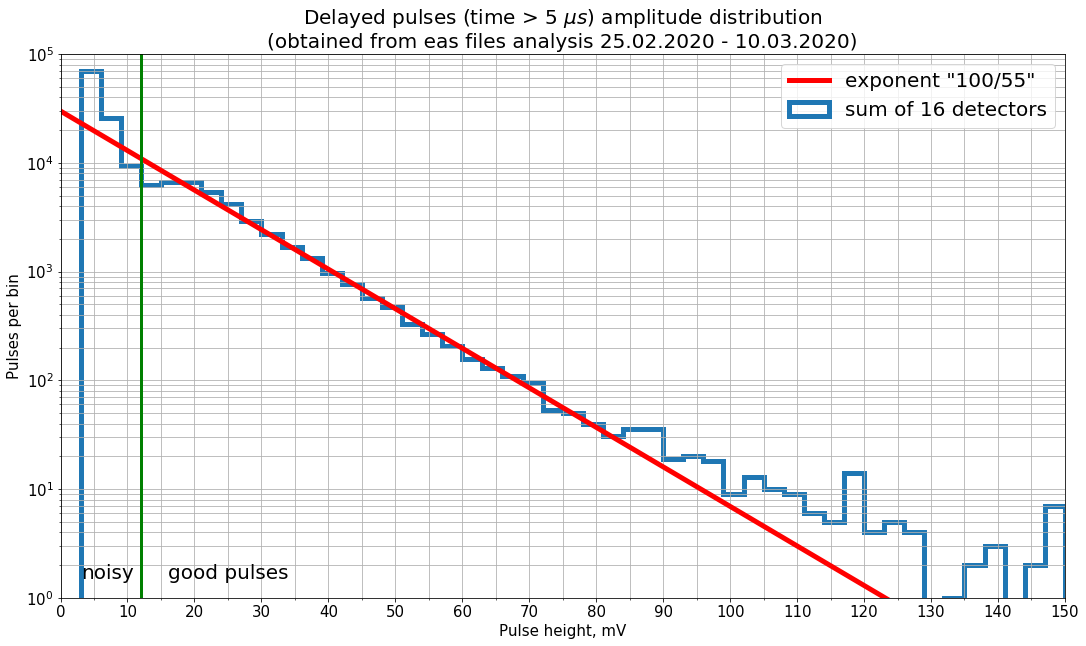

In [84]:
fig, ax = plt.subplots(figsize=(18,10))
total = np.array([])
for i in range(1,17):
    total = np.append(total, amps[str(i)].ravel())
    total = np.append(total, amps2[str(i)].ravel())
    
for i in range(1,17):
    #if i == 15: continue;
    #n, bins, patches = ax.hist(amps[str(i)].ravel(),bins=60,range=[0,150],histtype='step',lw=3)
    if n[2] > 1e3:
        print(i)

n, bins, patches = ax.hist(total,bins=50,range=[0,150],histtype='step',lw=5,label='sum of 16 detectors')
plt.semilogy()
x = np.linspace(0,200,1000)
y = 3e4*np.exp(-x/(55/np.log(100)))
plt.plot(x,y, c = 'r', lw=5, label='exponent \"100/55\"')
#y = 1.5e11*x**(-5)
#plt.plot(x,y, c = 'b', lw=5, label='power law 1.5e11*x^(-5)')
plt.xlim(0,150)
plt.ylim(1,1e5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('Pulse height, mV', fontsize=15)
ax.set_ylabel('Pulses per bin', fontsize=15)
ax.set_title('Delayed pulses (time > 5 $\mu s$) amplitude distribution\n\
(obtained from eas files analysis 25.02.2020 - 10.03.2020)', fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
plt.grid(which='both')
plt.axvline(12,c='g',lw=3)
plt.text(3, 1.5, 'noisy', fontsize=20)
plt.text(16, 1.5, 'good pulses', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('sum16det_delayed_pulse_amp_semilogY.png', dps=600)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


/media/oleg/ssd/home/oleg/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in power


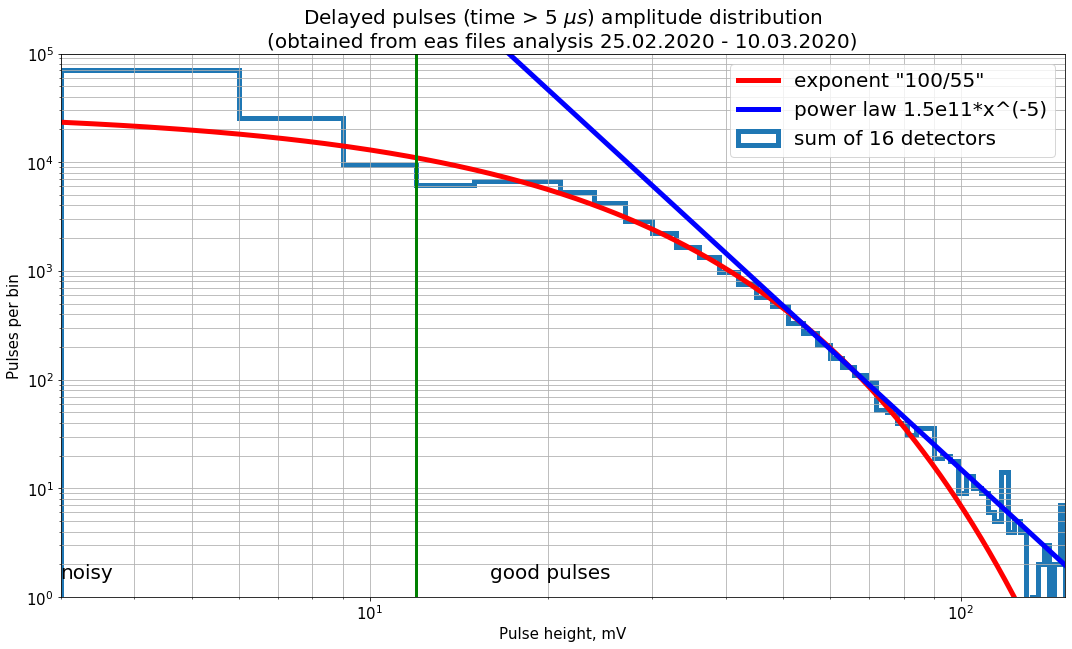

In [82]:
fig, ax = plt.subplots(figsize=(18,10))
total = np.array([])
for i in range(1,17):
    total = np.append(total, amps[str(i)].ravel())
    total = np.append(total, amps2[str(i)].ravel())
    
for i in range(1,17):
    #if i == 15: continue;
    #n, bins, patches = ax.hist(amps[str(i)].ravel(),bins=60,range=[0,150],histtype='step',lw=3)
    if n[2] > 1e3:
        print(i)

n, bins, patches = ax.hist(total,bins=50,range=[0,150],histtype='step',lw=5,label='sum of 16 detectors')
plt.loglog()
x = np.linspace(0,200,1000)
y = 3e4*np.exp(-x/(55/np.log(100)))
plt.plot(x,y, c = 'r', lw=5, label='exponent \"100/55\"')
y = 1.5e11*x**(-5)
plt.plot(x,y, c = 'b', lw=5, label='power law 1.5e11*x^(-5)')
plt.xlim(3,150)
plt.ylim(1,1e5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('Pulse height, mV', fontsize=15)
ax.set_ylabel('Pulses per bin', fontsize=15)
ax.set_title('Delayed pulses (time > 5 $\mu s$) amplitude distribution\n\
(obtained from eas files analysis 25.02.2020 - 10.03.2020)', fontsize=20)
#ax.xaxis.set_major_locator(MultipleLocator(10))
#ax.xaxis.set_minor_locator(MultipleLocator(5))
plt.grid(which='both')
plt.axvline(12,c='g',lw=3)
plt.text(3, 1.5, 'noisy', fontsize=20)
plt.text(16, 1.5, 'good pulses', fontsize=20)
plt.legend(fontsize=20)
plt.savefig('sum16det_delayed_pulse_amp_loglog.png', dps=600)

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))

for i in range(1,17):
    #if i == 15: continue;
    n, bins, patches = ax.hist(amps[str(i)].ravel(),bins=60,range=[0,150],histtype='step',lw=3)
    if n[2] > 1e3:
        print(i)

plt.semilogy()
x = np.linspace(0,200,1000)
y = 1.5e3*np.exp(-x/(55/np.log(100)))
plt.plot(x,y, c = 'r', lw=5, label='exponent \"100/55\"')
plt.xlim(0,150)
plt.ylim(1,1e4)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('Pulse height, mV', fontsize=15)
ax.set_ylabel('Pulses per bin', fontsize=15)
ax.set_title('Delayed pulses (time > 500 $\mu s$) amplitude distribution\n\
(obtained from eas files analysis 25.02.2020 - 10.03.2020)', fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
plt.grid(which='both')
plt.axvline(12,c='g',lw=3)
plt.text(3, 1.5, 'noisy', fontsize=20)
plt.text(16, 1.5, 'good pulses', fontsize=20)
plt.legend(fontsize=20)
#plt.savefig('../pictures/neutron_amp_distribushion.png',dps=600);

In [ ]:
plt.figure(figsize=(18,10))

for i in range(1,17):
    #if i == 15: continue;
    n, bins, patches = plt.hist(amps[str(i)].ravel(),bins=30,range=[0,150],histtype='step',lw=3)
    if n[2] > 1e3:
        print(i)

plt.semilogy()
x = np.linspace(0,200,1000)
y = 3e3*np.exp(-x/(55/np.log(100)))
plt.plot(x,y)
plt.xlim(0,150)
plt.ylim(1,1e4)

In [ ]:
for root, dirs, files in os.walk(".", topdown=False):
     for name in files:
        print(os.path.join(root, name))

In [ ]:
data = pd.read_csv('Eas01-08-2019-0.txt', delim_whitespace=True, names=np.array([[str(i)+'x', str(i)] for i in range(1,17)]).ravel())
plt.figure(figsize=(18,10))
i = 2
idata = data[[str(i) + 'x',str(i)]][data[str(i)+'x'] > 0]
plt.step(idata['2x']/1000.,idata[str(i)])
plt.axhline(3,c='r')
#print(idata[['2x','2']])
plt.xlim(13492,13495)

In [ ]:
ls -l

In [ ]:
%sed -n 1,700 Eas01-08-2019.txt